## Sine Wave Prediction using Elman RNN

In [42]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In [43]:
torch.manual_seed(1) #Seed initialisation for random number generator

dtype = torch.FloatTensor

#Input_size = 7(6 context neurons and 1 input neuron)
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
seq_length = 20
lr = 0.1

### Random Sine wave input

In [44]:
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

### Weight initialisation

In [45]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal_(w1, 0.0, 0.4)
w1 =  Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

### Elman RNN

In [46]:
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1)
  context_state = torch.tanh(xh.mm(w1))
  out = context_state.mm(w2)
  return  (out, context_state)

### Training

In [47]:
for i in range(epochs):
  total_loss = 0
  context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
  for j in range(x.size(0)):
    input = x[j:(j+1)]
    target = y[j:(j+1)]
    (pred, context_state) = forward(input, context_state, w1, w2)
    loss = (pred - target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    w1.data -= lr * w1.grad.data
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    context_state = Variable(context_state.data)
  if i % 10 == 0:
     print("Epoch: {} loss {}".format(i, total_loss.data[0]))

/home/dixith/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0 loss 2.01560926437
Epoch: 10 loss 0.302462786436
Epoch: 20 loss 0.268351882696
Epoch: 30 loss 0.244405955076
Epoch: 40 loss 0.226059556007
Epoch: 50 loss 0.214263424277
Epoch: 60 loss 0.207835316658
Epoch: 70 loss 0.205058798194
Epoch: 80 loss 0.204210400581
Epoch: 90 loss 0.203713059425
Epoch: 100 loss 0.202297583222
Epoch: 110 loss 0.199190154672
Epoch: 120 loss 0.194156467915
Epoch: 130 loss 0.187336757779
Epoch: 140 loss 0.178972601891
Epoch: 150 loss 0.169212684035
Epoch: 160 loss 0.158103510737
Epoch: 170 loss 0.145718619227
Epoch: 180 loss 0.132336109877
Epoch: 190 loss 0.118551127613
Epoch: 200 loss 0.105246573687
Epoch: 210 loss 0.0934070050716
Epoch: 220 loss 0.0837709382176
Epoch: 230 loss 0.0765102505684
Epoch: 240 loss 0.0712187066674
Epoch: 250 loss 0.0672497823834
Epoch: 260 loss 0.0640556514263
Epoch: 270 loss 0.0613010264933
Epoch: 280 loss 0.0588191784918
Epoch: 290 loss 0.0565444529057


### Prediction

In [48]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

for i in range(x.size(0)):
  input = x[i:i+1]
  (pred, context_state) = forward(input, context_state, w1, w2)
  context_state = context_state
  predictions.append(pred.data.numpy().ravel()[0])

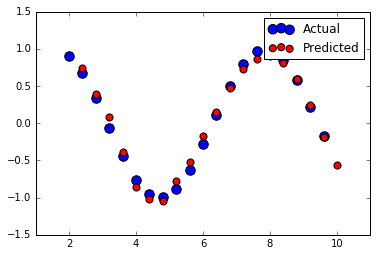

In [49]:
pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, s=50,c='r',label="Predicted")
pl.legend()
pl.show()